In [28]:
import matplotlib.pyplot as plt

from keras.datasets import mnist 
from keras.models import Sequential

In [29]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

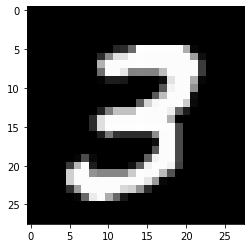

Label:  3


In [30]:
plt.imshow(X_train[7],cmap = 'gray')
plt.show()
print("Label: ",y_train[7])

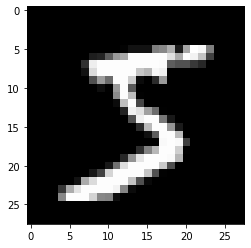

Label:  5


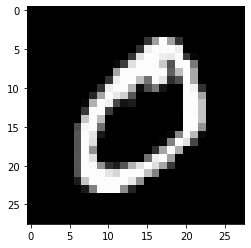

Label:  0


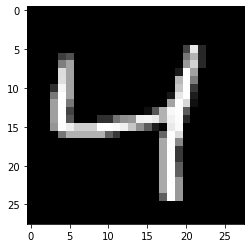

Label:  4


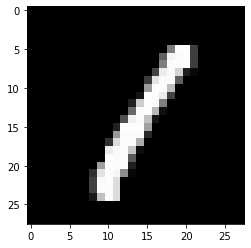

Label:  1


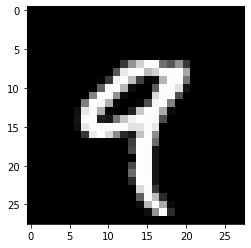

Label:  9


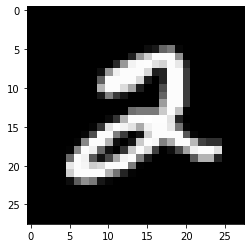

Label:  2


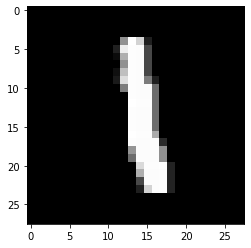

Label:  1


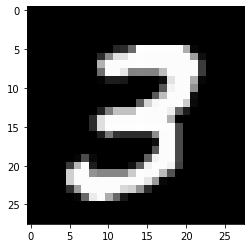

Label:  3


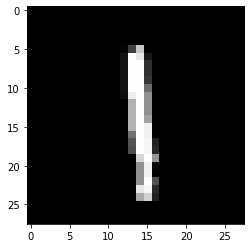

Label:  1


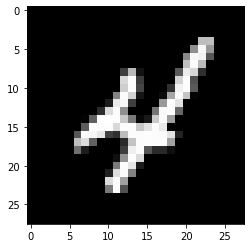

Label:  4


In [31]:
for i in range(0,10):
  plt.imshow(X_train[i],cmap = 'gray')
  plt.show()
  print("Label: ",y_train[i])

In [32]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
#Flatten these images or X data: (n,28,28) -> (n,784)
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0],-1))

In [35]:
X_train.shape

(60000, 784)

In [36]:
#0 - Black and 253 - White - colour value
X_train[7]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

In [37]:
#Converting y data into categorical (one -hot encoding), Multiclass classification in Keras
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
##30-40
from sklearn.model_selection import train_test_split
X_train,_,y_train,_ = train_test_split(X_train,y_train,test_size = 0.67,random_state =7)

In [39]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(19800, 784) (19800, 10) (10000, 784) (10000, 10)


In [40]:
#Basic MLP Network
from keras.layers import Activation, Dense
from keras import optimizers

In [41]:
model = Sequential()

In [42]:
#Activation as Sigmoid for each layers except o/p which - Softmax, 50 - neurons and o/p 10 
model.add(Dense(50,input_shape = (784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [43]:
sgd = optimizers.SGD(lr= 0.001)
model.compile(optimizer = sgd,loss = 'categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [44]:
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs =100,verbose = 0)

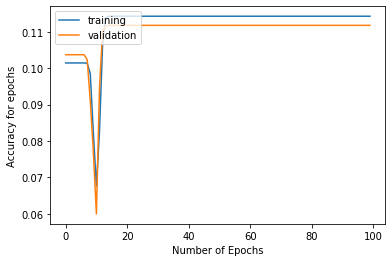

In [49]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [46]:
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3001 - accuracy: 0.1135


In [47]:
results[1]

0.11349999904632568

In [47]:
#Weight Initialization

In [52]:
#Xavier and He initialization for proper weight initialization
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784,), kernel_initializer= 'he_normal'))     #use he_normal initializer
  model.add(Activation('sigmoid'))        
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('sigmoid'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('sigmoid'))
  model.add(Dense(10, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(lr= 0.001)
  model.compile(optimizer = sgd,loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model 

In [53]:
model = mlp_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [55]:
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs = 100,verbose = 0)

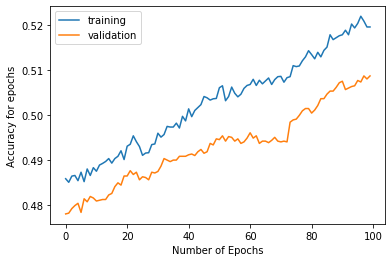

In [56]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [57]:
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8366 - accuracy: 0.5126


In [58]:
#Non Saturating Activation Function

In [59]:
#Non Saturation Activation Function
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784,), kernel_initializer= 'he_normal'))     #use he_normal initializer
  model.add(Activation('relu'))        
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(10, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('softmax'))

  sgd = optimizers.SGD(lr= 0.001)
  model.compile(optimizer = sgd,loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model 

In [64]:
model = mlp_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [65]:
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs = 100)

Epoch 1/100
55/55 [==============================] - 1s 11ms/step - loss: 32.6604 - accuracy: 0.3116 - val_loss: 3.1830 - val_accuracy: 0.4973
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 2.4164 - accuracy: 0.5453 - val_loss: 1.9004 - val_accuracy: 0.5699
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 1.6371 - accuracy: 0.6057 - val_loss: 1.5535 - val_accuracy: 0.6103
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 1.3250 - accuracy: 0.6438 - val_loss: 1.3636 - val_accuracy: 0.6402
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 1.1245 - accuracy: 0.6782 - val_loss: 1.2412 - val_accuracy: 0.6505
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 1.0494 - accuracy: 0.6985 - val_loss: 1.1292 - val_accuracy: 0.6870
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.9538 - accuracy: 0.7223 - val_loss: 1.1394 - val_accuracy: 0.6810
Epoch 8/100

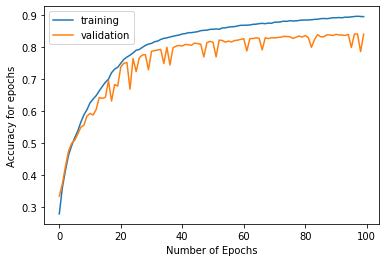

In [62]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [66]:
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5612 - accuracy: 0.8663


In [71]:
print("Loss,Accuracy")
results

Loss,Accuracy


[0.5611760020256042, 0.8662999868392944]

In [72]:
#optimizers changed from SGD to ADam
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784,), kernel_initializer= 'he_normal'))     #use he_normal initializer
  model.add(Activation('relu'))        
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(10, kernel_initializer= 'he_normal')) #use he_normal initializer
  model.add(Activation('softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(optimizer = adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model 

In [73]:
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs = 100)

Epoch 1/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2511 - accuracy: 0.9229 - val_loss: 0.5897 - val_accuracy: 0.8604
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2488 - accuracy: 0.9240 - val_loss: 0.5855 - val_accuracy: 0.8631
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.9232 - val_loss: 0.5881 - val_accuracy: 0.8643
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9246 - val_loss: 0.5901 - val_accuracy: 0.8581
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2458 - accuracy: 0.9237 - val_loss: 0.5831 - val_accuracy: 0.8673
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2437 - accuracy: 0.9260 - val_loss: 0.5807 - val_accuracy: 0.8677
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.9240 - val_loss: 0.5988 - val_accuracy: 0.8640
Epoch 8/100
5

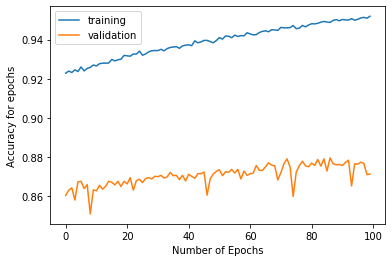

In [74]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [84]:
#optimizers changed from SGD to ADam
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784,)))     #use he_normal initializer
  model.add(Activation('relu'))        
  model.add(Dense(50)) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50)) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(50)) #use he_normal initializer
  model.add(Activation('relu'))
  model.add(Dense(10)) #use he_normal initializer
  model.add(Activation('softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(optimizer = adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model 

In [85]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs = 100,verbose = 0 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


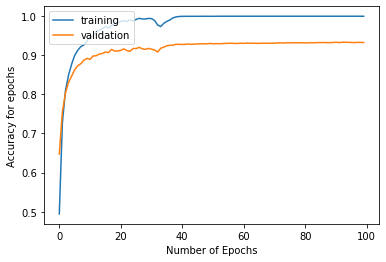

In [86]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [87]:
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.9316


In [88]:
print("Loss,Accuracy")
results

Loss,Accuracy


[0.6416245698928833, 0.9315999746322632]

In [89]:
from keras.layers import BatchNormalization

In [91]:
#optimizers changed from SGD to ADam
def mlp_model():
  model = Sequential()

  model.add(Dense(50,input_shape = (784,))) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))        
  model.add(Dense(50))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50)) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(50)) 
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  adam = optimizers.Adam(lr = 0.001)
  model.compile(optimizer = adam,loss = 'categorical_crossentropy',metrics = ['accuracy'])

  return model 

In [92]:
model = mlp_model()
history = model.fit(X_train,y_train,batch_size = 256,validation_split = 0.3,epochs = 100,verbose = 0 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


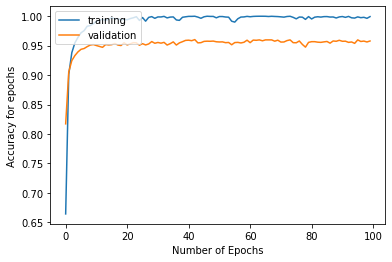

In [93]:
plt.plot(history.history['accuracy']) #-Training
plt.plot(history.history['val_accuracy']) #-Val
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy for epochs")
plt.legend(['training','validation'],loc= 'upper left')
plt.show()

In [94]:
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.9624


In [95]:
print("Loss,Accuracy")
results

Loss,Accuracy


[0.18354767560958862, 0.9624000191688538]